In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/TensorFlow-2.x-YOLOv4-master/

# !unzip -qq "./ESG_Training_Dataset_"

/content/drive/MyDrive/TensorFlow-2.x-YOLOv3-master


In [ ]:
!pip install -r ./requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.5 MB 56.8 MB/s 
     |████████████████████████████████| 59 kB 7.6 MB/s 
     |████████████████████████████████| 3.9 MB 68.5 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 636 kB 76.8 MB/s 
     |████████████████████████████████| 10.1 MB 46.9 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 548 kB 94.8 MB/s 
     |████████████████████████████████| 127 kB 89.5 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f6882377d1e3ccaee551c7653c4ac8f7ad20857c1725cca3cd2512b1e2cc8270
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24

In [ ]:
!nvidia-smi

Thu Nov 17 09:17:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import shutil
import numpy as np
import tensorflow as tf
#from tensorflow.keras.utils import plot_model
from yolov3.dataset_train import Dataset_train
from yolov3.dataset_test import Dataset_test

#pickling
import pickle

trainset = Dataset_test('test')

with open('./trainset.p', 'wb') as file: # train set 피클링
  pickle.dump(trainset, file)

testset =  Dataset_train('train')

with open('./testset.p', 'wb') as file: # test set 피클링
  pickle.dump(testset, file)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9135911539864996164
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5323472832416569615
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
!python ./train.py

2022-11-18 13:54:35.599079: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 640812442662038240
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16320557782636890167
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
epoch: 0 step:    2/81, lr:0.000010, giou_loss:   0.86, conf_loss:   0.12, prob_loss:   0.59, total_loss:   1.57
epoch: 0 step:    3/81, lr:0.000010, giou_loss:   2.34, conf_loss:   1.55, prob_loss:   1.06, total_loss:   4.96
epoch: 0 step:    4/81, lr:0.000010, giou_loss:   1.88, conf_loss:   0.78, prob_loss:  

1/1 [==============================] - 11s 11s/step
predicted image


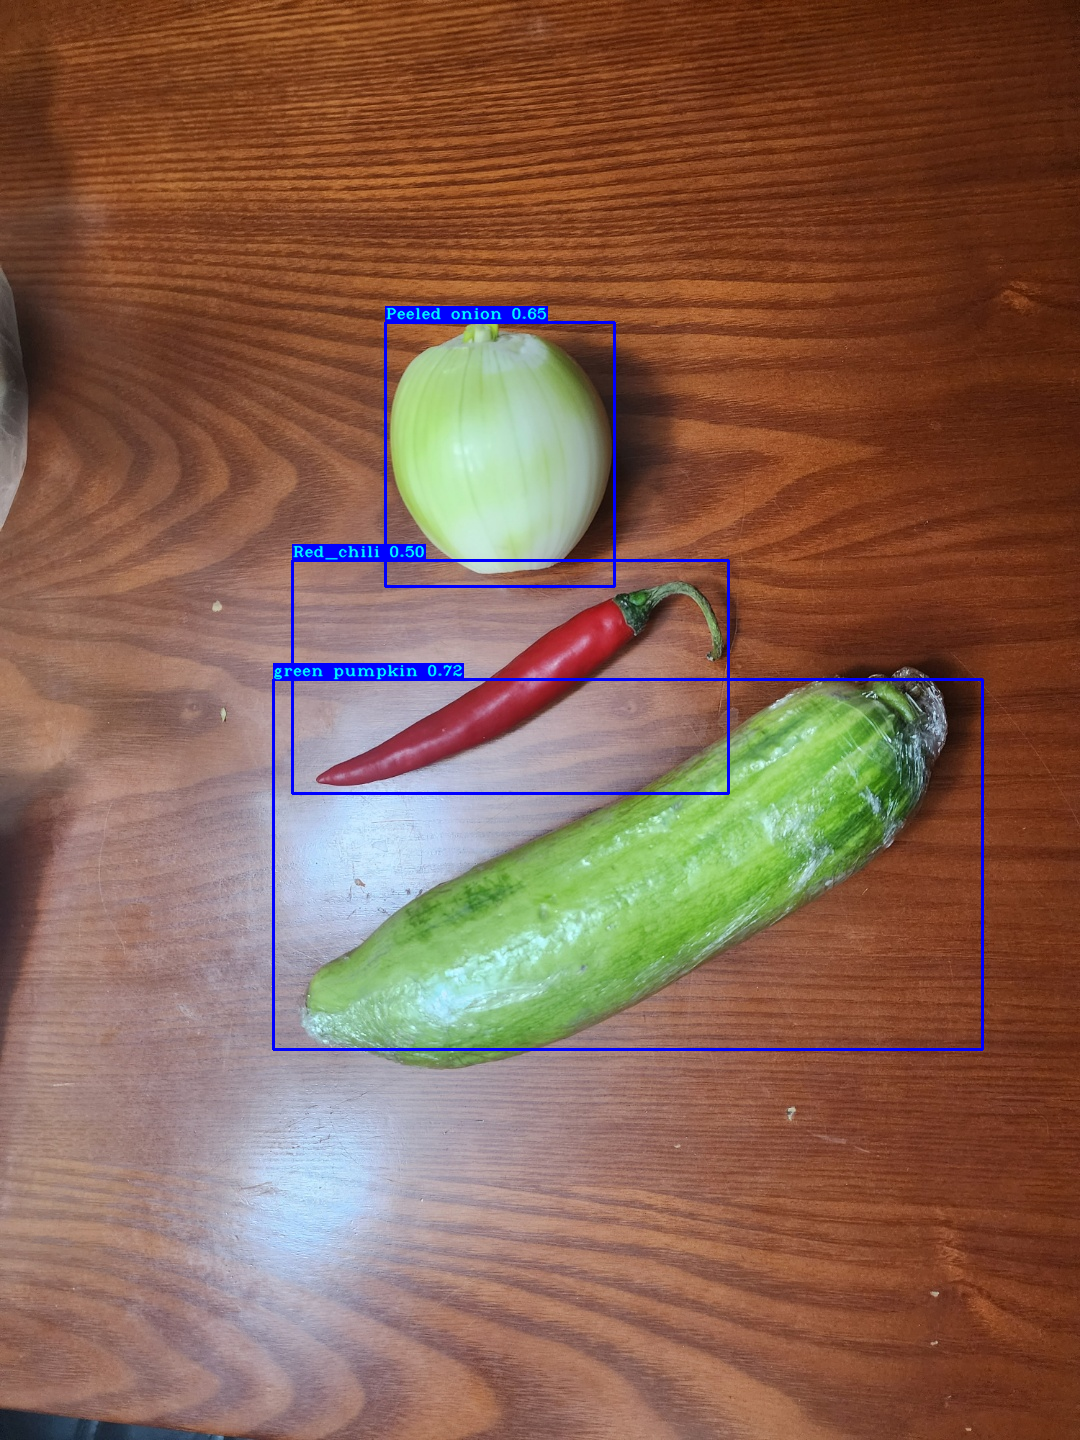

Peeled onion
Red_chili
green pumpkin
[1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np
from yolov3.utils import detect_image, Load_Yolo_model, Create_Yolo, make_ingredients_list
from yolov3.configs import *
from yolov3.yolov4 import read_class_names

image_path   = "./IMAGES/Test_img1.jpg" # predict 할 이미지

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES) # 모델 불러오기
yolo.load_weights(f"./checkpoints/yolov4_custom_val_loss_Best")  # 모델 weight 불러오기
NUM_CLASS = read_class_names(TRAIN_CLASSES)  # CLASSES NUM, 모델 서버 시작하기 전에 실행

image,pred_classes = detect_image(yolo, image_path, "./IMAGES/Test_img1_pred.jpg", 
                     input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0)) # detect 함수

if len(pred_classes) == 0: print("검출 안 됐음. 다시 사진 업로드 해주세요.")

ingredients_list = make_ingredients_list(NUM_CLASS,pred_classes) # 재료 리스트 벡터화

print(ingredients_list)
